In [185]:
import gc
import scipy.io as sio
import scipy.fft as sfft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [186]:
path = '../datasets/B101/'
files = os.listdir(path)
files = [file for file in files if file.endswith('_trimmed.mat')]

In [187]:
dataSet = {}
for file in files:
    fileName = os.path.basename(file)
    fileName = fileName.split('.')[0]
    fileName = fileName.removeprefix('Channel')
    fileName = fileName.removesuffix('_trimmed')
    dataSet[fileName] = sio.loadmat(path + file)

In [188]:
dataSet['1']['trimmedMatrix'][0]

array([-21702628. ,  -8657071. ,   7671702. , ...,   8025217. ,
         5740304. ,   5312691.5], dtype=float32)

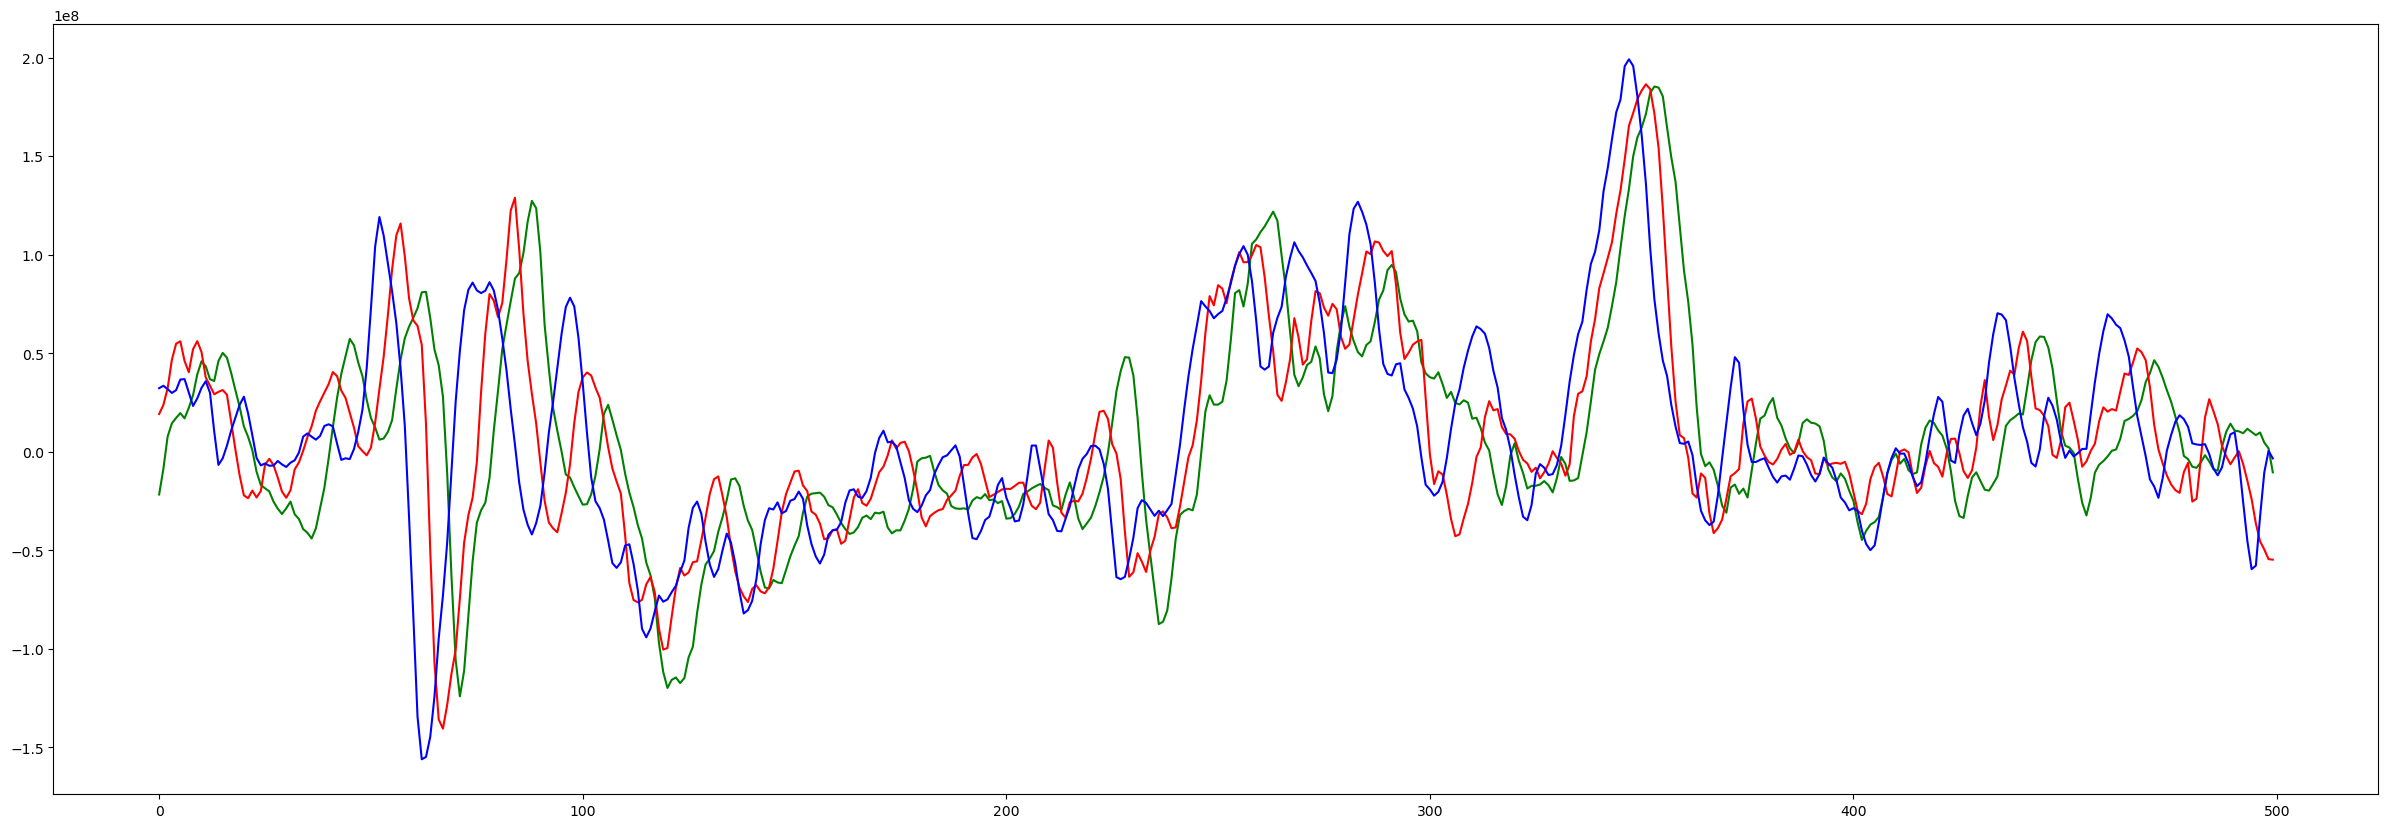

In [189]:
#Plot the first channel
plt.figure(figsize=(30,10))
plt.plot(dataSet['1']['trimmedMatrix'][0][:500], 'g')
plt.plot(dataSet['2']['trimmedMatrix'][0][:500], 'r')
plt.plot(dataSet['3']['trimmedMatrix'][0][:500], 'b')
#plt.plot(dataSet['4']['trimmedMatrix'][0][:1000])
plt.show()

In [190]:
#normalise data to -1 to 1
def normalise(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * 2 - 1

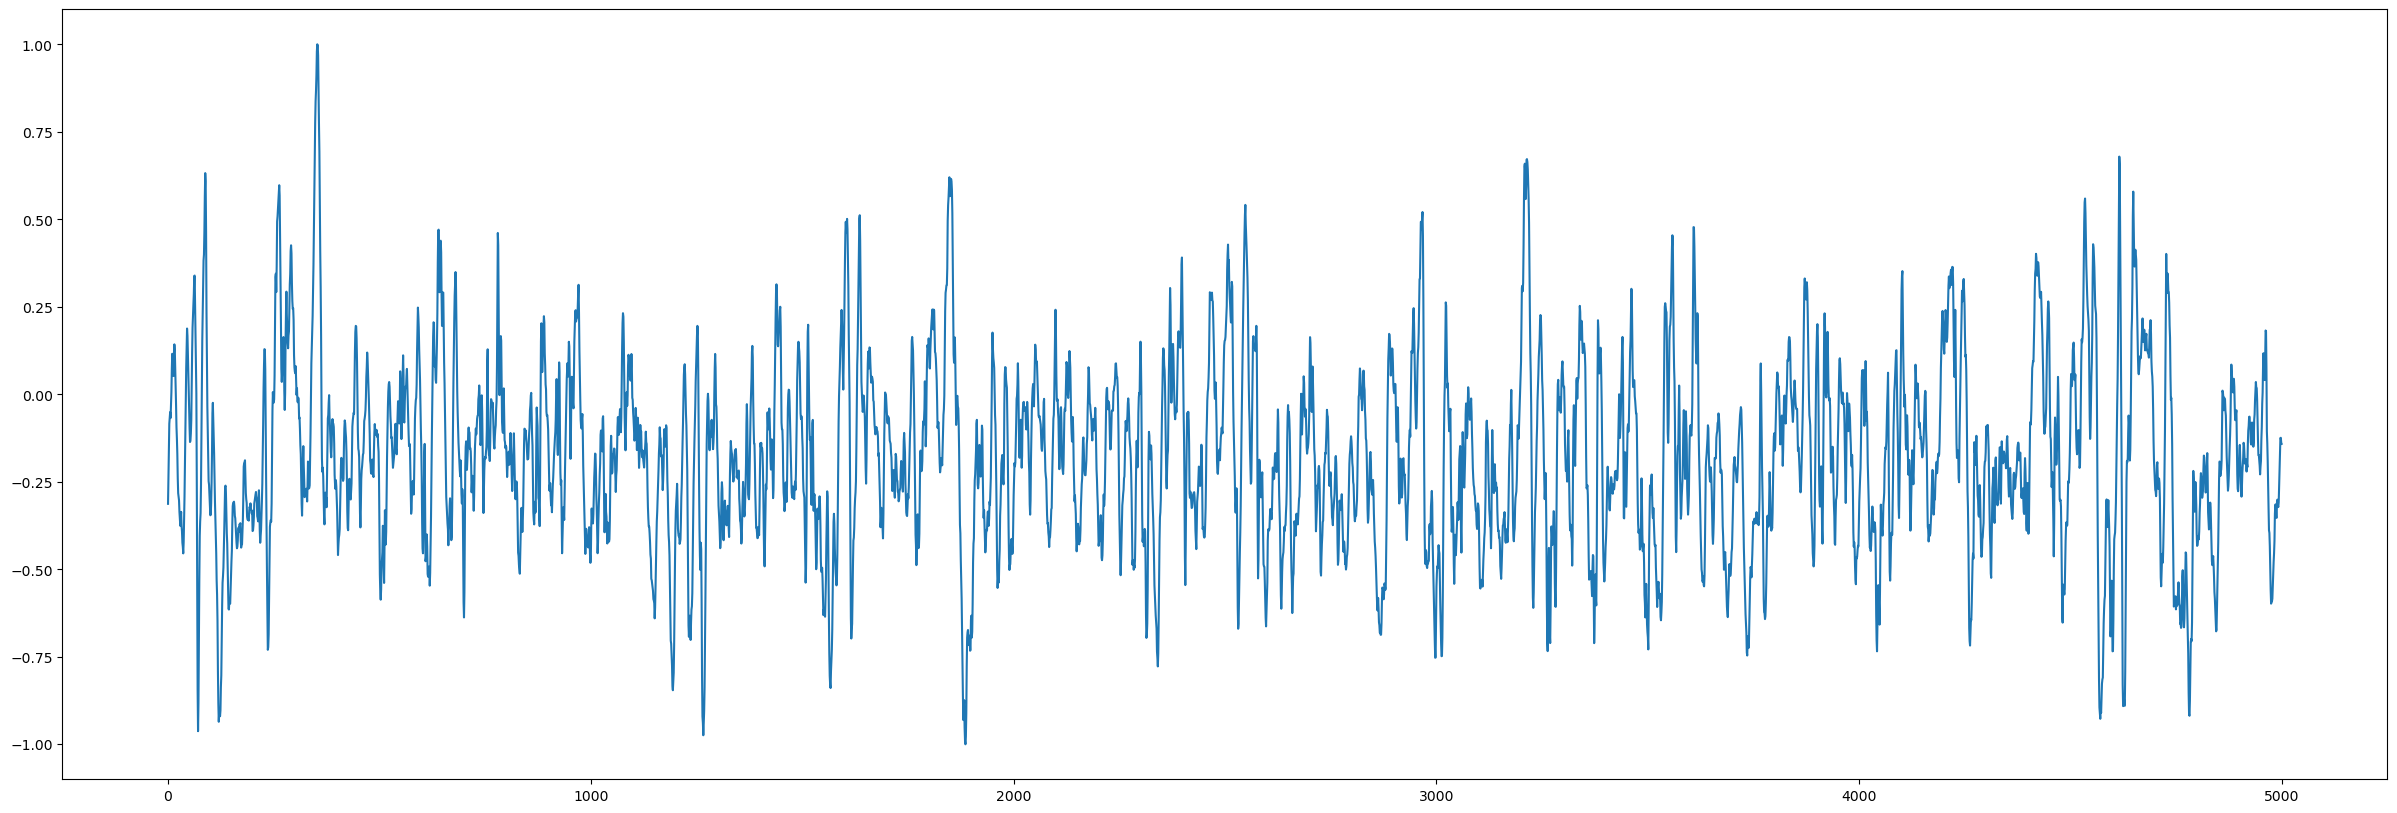

In [191]:
#Plot the first channel normalised
plt.figure(figsize=(30,10))
plt.plot(normalise(dataSet['1']['trimmedMatrix'][0]))
plt.show()

In [192]:
#do FFT on data
def fft(data):
    return np.fft.fft(data)

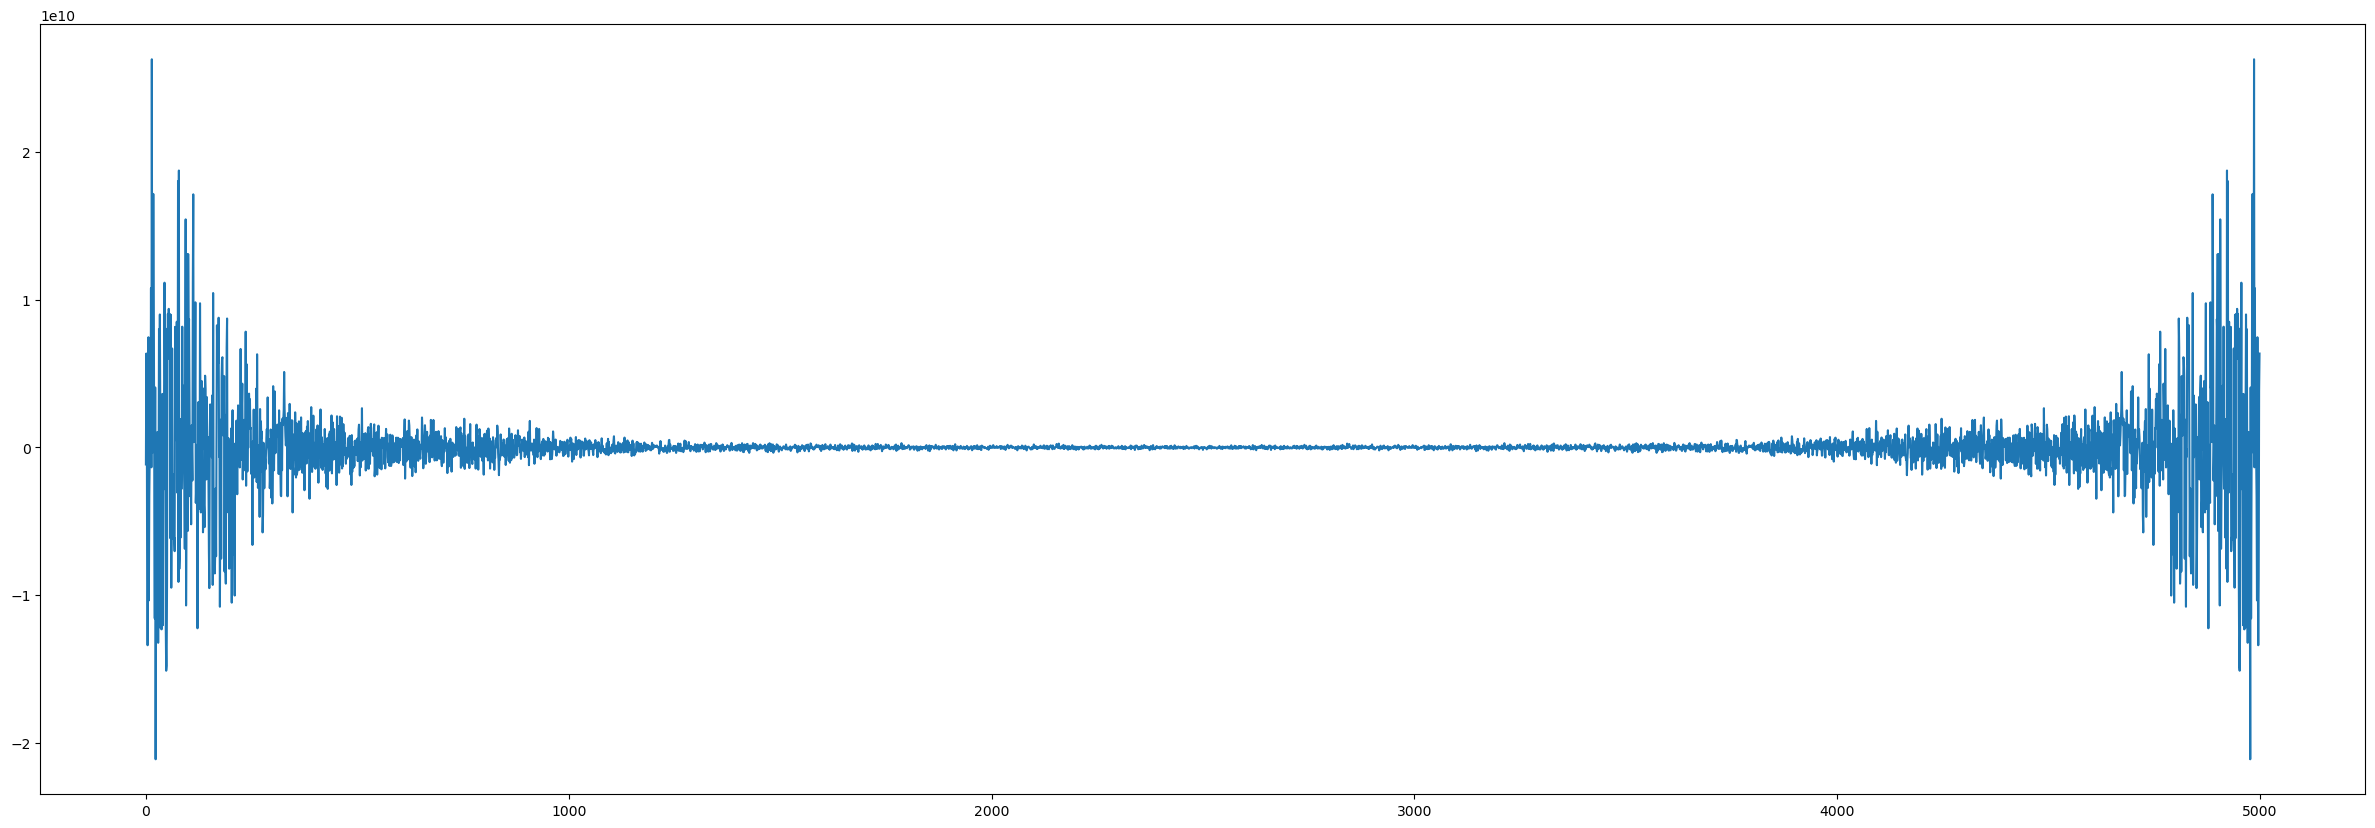

In [193]:
#Plot fft
plt.figure(figsize=(30,10))
plt.plot(fft(dataSet['1']['trimmedMatrix'][0]))